# 항공사 지연 요인 분석 보고서
## 1. 프로젝트 개요
- 분석 목적: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- 데이터 출처: 항공 운항 지연률 데이터 (총 33,468건)
- 분석 대상 변수:
    - pct_carrier_delay: 운항사 요인
    - pct_atc_delay: 관제 요인
    - pct_weather_delay: 기상 요인
    - airline: 항공사명

In [108]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("../data/airline_stats.csv")  # 파일명은 상황에 맞게 수정

# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


- 수치형 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay
- 범주형 변수: airlind

In [109]:
# 데이터 샘플 보기
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


## 2. 데이터 전처리
### 2.1 결측치 탐색
        - 결측치가 있는 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay (각 28건)
### 2.2 결측치 처리
        1. 결측치 행 제거
        2. 항공사별 중앙값으로 대체

In [110]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

6개의 항공사
Delta 가 가장 많은 데이터를 갖고 있고 5천건의 비슷한 데이터 양의 항공사로 American, Southwest, United 가 있다.

In [146]:
#항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


표준편차가 가장 큰 항공사는 United 로 5.36 → 변동성이 높음, 고객 경험 일관성에 불리

In [111]:
# 결측치 개수 확인
missing_count = df.isnull().sum()
missing_count

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

각 변수별로 28건 결측치

In [112]:
# 1. 결측치 행 제거
df_dropna = df.dropna()
df_dropna.info()
df_dropna.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

In [113]:
# 2. 항공사별 중앙값으로 대체
df_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_filled[col] = df_filled.groupby('airline')[col].transform(lambda x: x.fillna(x.median()))


In [114]:
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [115]:
df_dropna.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [116]:
df_filled.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33468.000000,33468.000000,33468.000000
mean,7.040845,5.089187,0.684473
std,4.495832,4.716795,1.073355
min,0.000000,0.000000,0.000000
25%,4.147084,2.148281,0.000000
50%,6.357260,3.900299,0.316002
75%,9.136141,6.625000,0.934579
max,100.000000,100.000000,33.333333


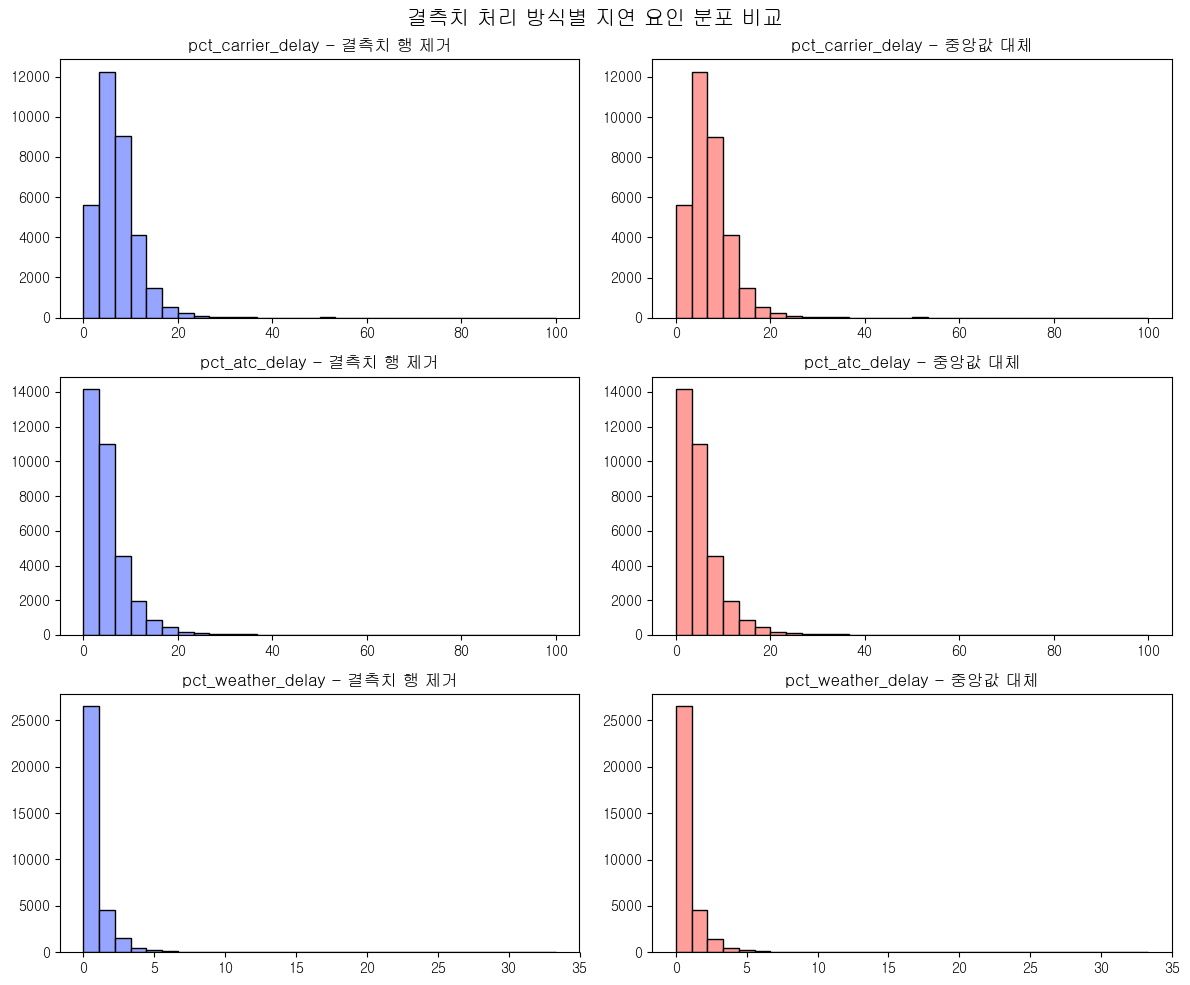

In [117]:
# 히스토그램
import matplotlib.pyplot as plt

delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
labels = ['결측치 행 제거', '중앙값 대체']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('결측치 처리 방식별 지연 요인 분포 비교', fontsize=15)

for i, var in enumerate(delay_vars):
    # 왼쪽: 행 제거
    axes[i,0].hist(df_dropna[var], bins=30, color='#96A5FF', edgecolor='black')
    axes[i,0].set_title(f'{var} - {labels[0]}')
    
    # 오른쪽: 중앙값 대체
    axes[i,1].hist(df_filled[var], bins=30, color='#FF9E9B', edgecolor='black')
    axes[i,1].set_title(f'{var} - {labels[1]}')

plt.tight_layout()
plt.show()



In [118]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return len(outliers)

delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

print("=== 이상치 개수 ===")
for var in delay_vars:
    outliers_dropna = count_outliers(df_dropna, var)
    outliers_filled = count_outliers(df_filled, var)
    print(f"{var} | 결측치 행 제거: {outliers_dropna}개, 중앙값 대체: {outliers_filled}개")


=== 이상치 개수 ===
pct_carrier_delay | 결측치 행 제거: 961개, 중앙값 대체: 966개
pct_atc_delay | 결측치 행 제거: 1781개, 중앙값 대체: 1788개
pct_weather_delay | 결측치 행 제거: 2181개, 중앙값 대체: 2184개


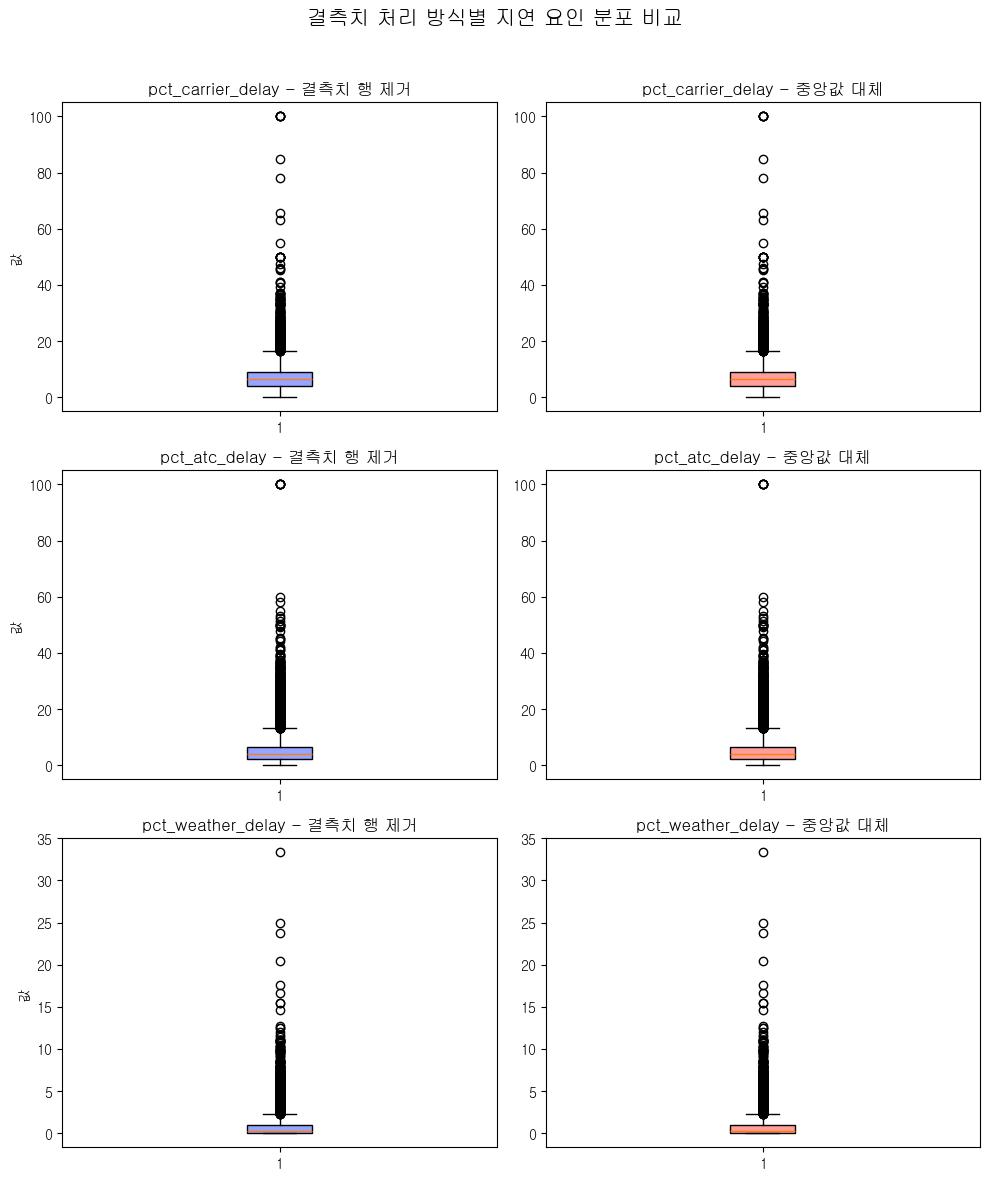

In [150]:
# 박스플롯
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('결측치 처리 방식별 지연 요인 분포 비교', fontsize=15)

for i, var in enumerate(delay_vars):
    # 행 제거 박스플롯
    axes[i,0].boxplot(df_dropna[var].dropna(), patch_artist=True,
                      boxprops=dict(facecolor='#96A5FF'))
    axes[i,0].set_title(f'{var} - {labels[0]}')
    axes[i,0].set_ylabel('값')
    
    # 중앙값 대체 박스플롯
    axes[i,1].boxplot(df_filled[var].dropna(), patch_artist=True,
                      boxprops=dict(facecolor='#FF9E9B'))
    axes[i,1].set_title(f'{var} - {labels[1]}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [120]:
df = df_dropna.copy()

- 원본 데이터 개수: 33,468개
- 결측치 행 제거 후 데이터 개수: 33,440개 (28개 행 삭제)
- 중앙값 대체 후 데이터 개수: 33,468개 (원본과 동일)

데이터 손실이 28개에 불과하고 분포 차이가 미미하므로 
**결측치 행 제거 방식을 사용하기로 결정**

## 3. 탐색적 데이터 분석 (EDA)
### 3.1 변수별 분포
- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인
### 3.2 항공사별 비교
- 항공사별 평균 지연율 비교 (막대그래프)
- 항공사별 상자그림 비교

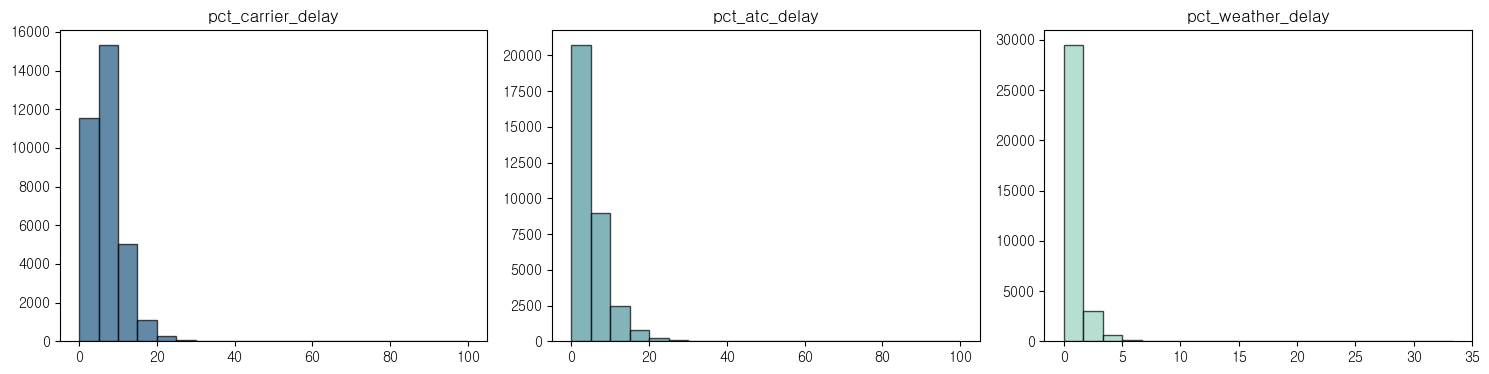

In [144]:
# 히스토그램
import matplotlib.pyplot as plt

delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
colors = ['#205781', '#4F959D', '#98D2C0']

plt.figure(figsize=(15, 4))
for i, var in enumerate(delay_vars, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[var].dropna(), bins=20, color=colors[i-1], alpha=0.7, edgecolor='black')
    plt.title(f'{var}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

항공사 지연요인 - 두번재 구간이 가장 높음
ATC 지연요인 - 첫번째 구간이 가장 높음
날씨 지연요인 - 첫번째 구간이 가장 높음

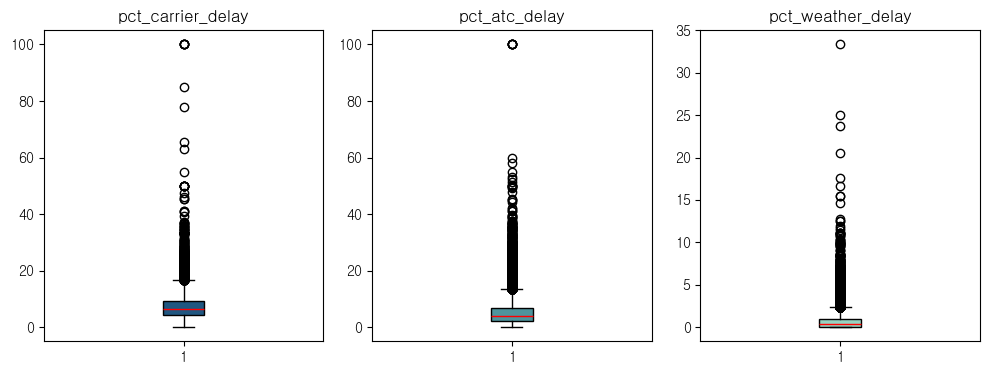

In [158]:
# 박스플롯
import matplotlib.pyplot as plt

delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
colors = ['#205781', '#4F959D', '#98D2C0']

plt.figure(figsize=(10, 4))

for i, var in enumerate(delay_vars, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[var].dropna(), patch_artist=True,
                boxprops=dict(facecolor=colors[i-1], color='black'),
                medianprops=dict(color='red'))
    plt.title(f'{var}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [159]:
# 막대그래프
# 항공사별 평균 지연율
import matplotlib.pyplot as plt

# delay 변수 리스트
delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
colors = ['#555879', '#A7C1A8', '#98A1BC']

# 항공사별 평균 계산
mean_delay_by_airline = df.groupby('airline')[delay_vars].mean()
mean_delay_by_airline


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


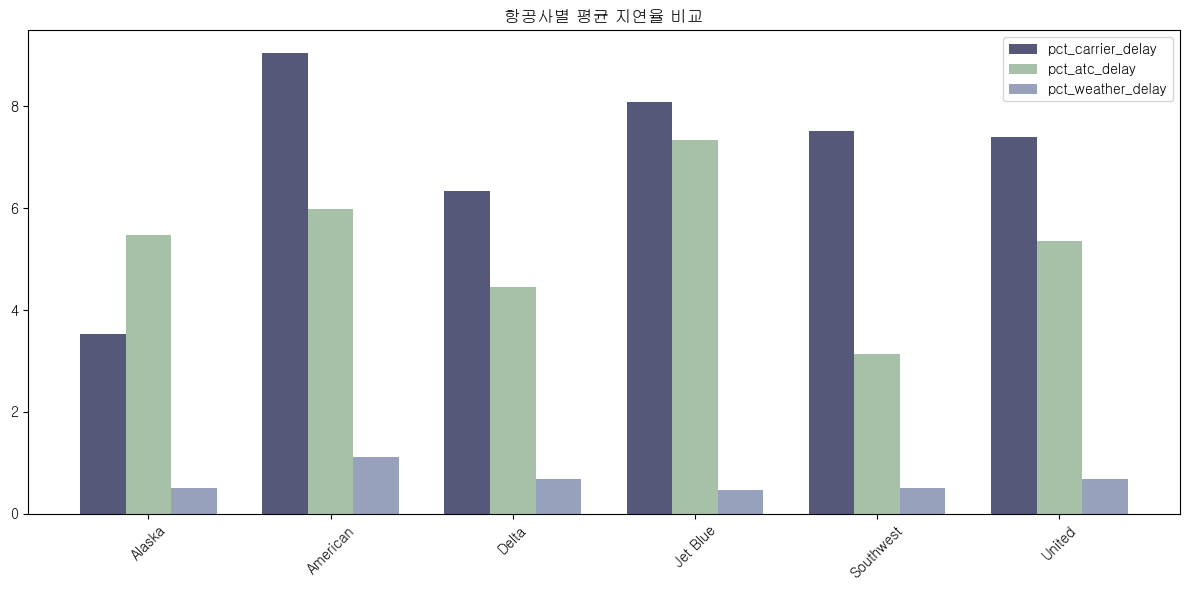

In [160]:
import numpy as np
import matplotlib.pyplot as plt

delay_vars = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
colors = ['#555879', '#A7C1A8', '#98A1BC']

mean_delay_by_airline = df.groupby('airline')[delay_vars].mean()

plt.figure(figsize=(12, 6))

bar_width = 0.25
x = np.arange(len(mean_delay_by_airline)) 

for i, var in enumerate(delay_vars):
    plt.bar(x + i * bar_width, mean_delay_by_airline[var], width=bar_width, color=colors[i], label=var)

plt.title('항공사별 평균 지연율 비교')
plt.xticks(x + bar_width, mean_delay_by_airline.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

항공사 내부 사정으로 인한 평균 지연율이 가장 높음 - American
항공 교통 통제로 인한 평균 지연율이 가장 높음 - Jet Blue
기상 조건으로 인한 평균 지연율이 가장 높음 - American

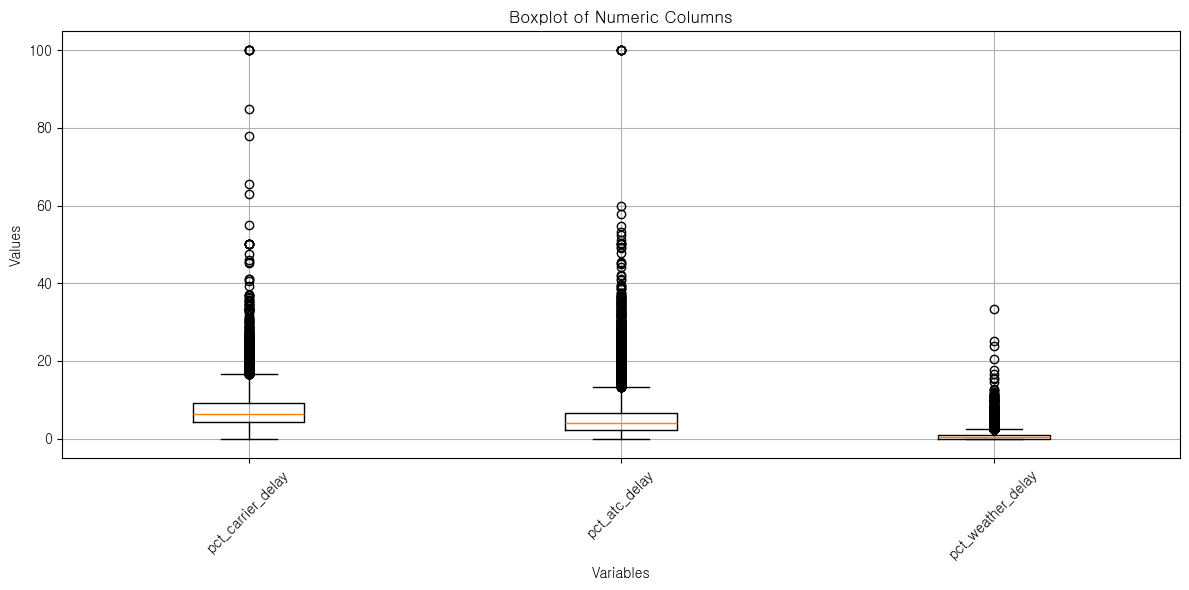

In [161]:
nu_df = df.select_dtypes(include='number')
# 박스플롯 그리기
plt.figure(figsize=(12, 6))
plt.boxplot(nu_df.values, tick_labels=nu_df.columns)

plt.title('Boxplot of Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

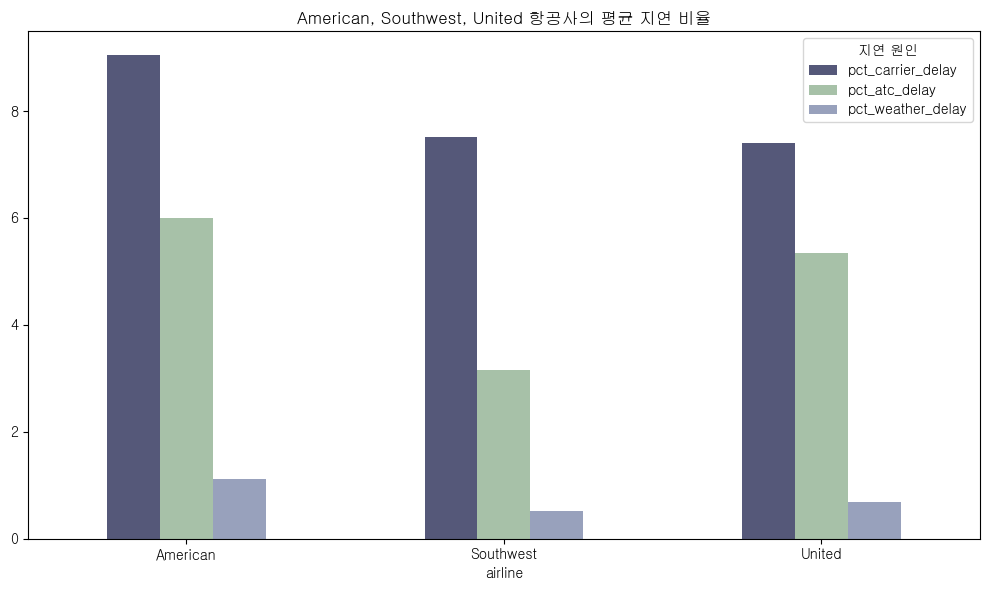

In [176]:
import matplotlib.pyplot as plt
filtered = df[
    (df['airline'] == 'American') |
    (df['airline'] == 'Southwest') |
    (df['airline'] == 'United')
]
grouped = filtered.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

grouped.plot(kind='bar', figsize=(10, 6), color=['#555879', '#A7C1A8', '#98A1BC'])
plt.title('American, Southwest, United 항공사의 평균 지연 비율')
plt.xticks(rotation=0)
plt.legend(title='지연 원인')
plt.tight_layout()
plt.show()

세 항공사 모두 지연 원인 내부 사정, 항공 교통 통제, 기상 조건으로 인한 지연 비율순으로 나타남

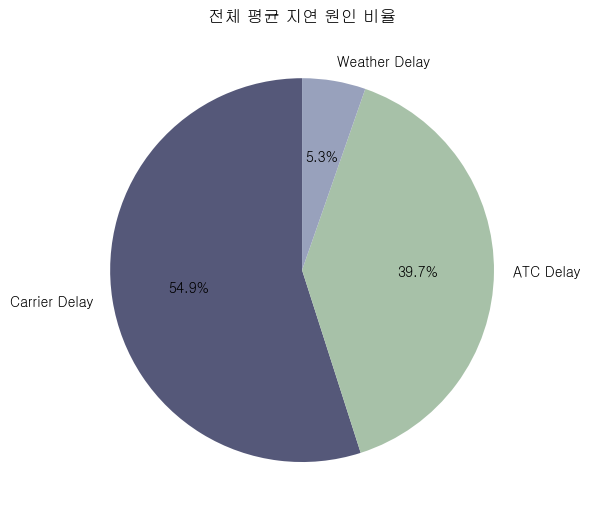

In [181]:
# 전체 지연 원인 비율
# 파이 차트
delay_means = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()
colors = ['#555879', '#A7C1A8', '#98A1BC']
labels = ['Carrier Delay', 'ATC Delay', 'Weather Delay']

plt.figure(figsize=(6, 6))
plt.pie(delay_means, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('전체 평균 지연 원인 비율')
plt.tight_layout()
plt.show()

Carrier Delay가 전체 지연 원인의 가장 큰 비중. 그 다음으로는 ATC Delay, Weather Delay 순